<center>

**HANDWRITTEN DIGIT RECOGNITION**

<img src="https://upload.wikimedia.org/wikipedia/commons/f/f7/MnistExamplesModified.png" width="500">

</center>


In [28]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import callbacks
from tensorflow.keras.datasets import mnist

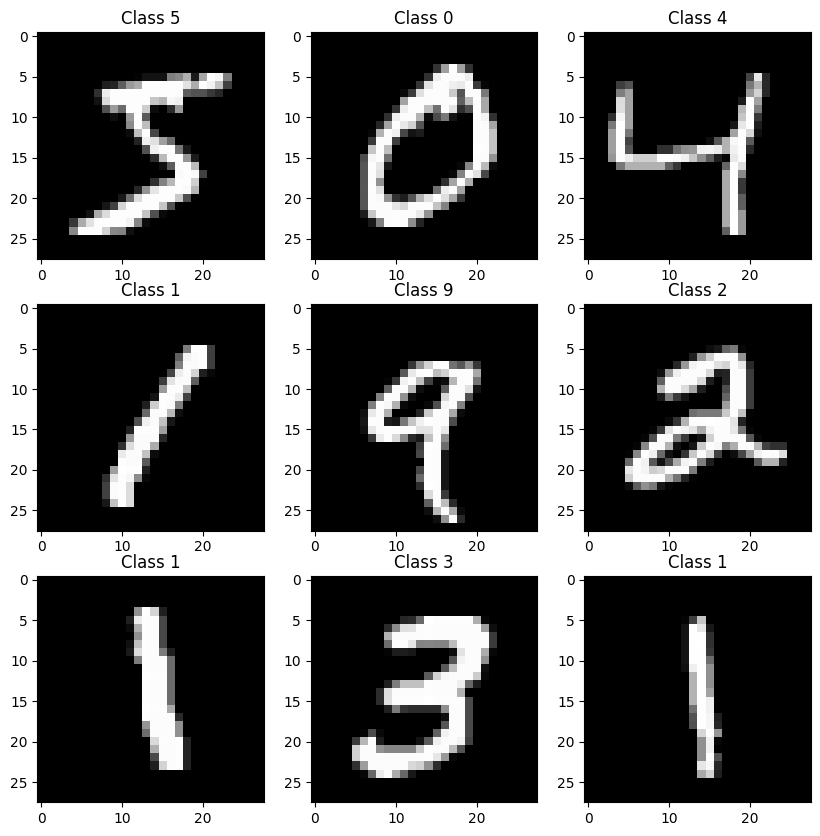

In [29]:
#Loading Data 
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Showing First 9 Images with y_train labels
fig, ax = plt.subplots(3,3, figsize = (10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))
plt.show()


In [30]:
# Seperate X_test and y_test into validation and test set 
x_val = x_test[:5000]
x_test = x_test[5000:]
y_val = y_test[:5000]
y_test = y_test[5000:]
print(x_train.shape, x_val.shape, x_test.shape)

(60000, 28, 28) (5000, 28, 28) (5000, 28, 28)


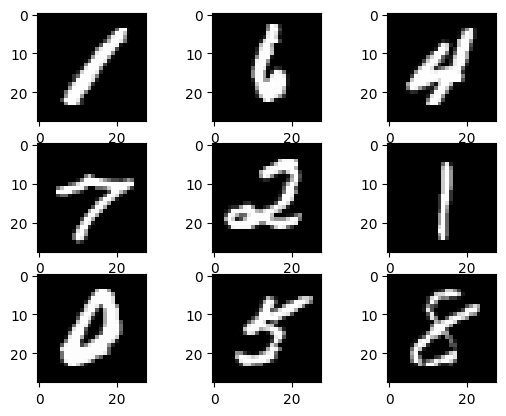

In [31]:
# Image Data Generator with normalization
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255)

# Applying Image Data Generator on train and test
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_val = x_val.reshape(x_val.shape[0], 28, 28, 1)
datagen.fit(x_train)
datagen.fit(x_test)
datagen.fit(x_val)

# Showing First 9 Images with y_train labels after Image Data Generator
for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(x_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    plt.show()
    break

In [41]:
# Building the model
model = Sequential()
# Convolutional Layer 1
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
# Max Pooling Layer 1
model.add(MaxPooling2D(pool_size=(2, 2)))
# Flatten
model.add(Flatten())
# Fully Connected Layer 1
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) 
model.add(Dense(128, activation='relu'))
# Fully Connected Layer 2
model.add(Dense(10, activation='softmax'))

early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True,
)

# Reduce learning rate when validation loss plateaus
reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5
)

# Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Training the model
model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=15, validation_data=(x_val, y_val), callbacks=[early_stopping, reduce_lr])

Epoch 1/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1507 - accuracy: 0.9539 - val_loss: 35.6513 - val_accuracy: 0.9422 - lr: 0.0010
Epoch 2/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0517 - accuracy: 0.9839 - val_loss: 63.2476 - val_accuracy: 0.9216 - lr: 0.0010
Epoch 3/15
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0321 - accuracy: 0.9900 - val_loss: 86.3270 - val_accuracy: 0.9240 - lr: 0.0010
Epoch 4/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0220 - accuracy: 0.9924 - val_loss: 56.9391 - val_accuracy: 0.9498 - lr: 0.0010
Epoch 5/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0165 - accuracy: 0.9945 - val_loss: 86.7318 - val_accuracy: 0.9326 - lr: 0.0010
Epoch 6/15
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0131 - accuracy: 0.9957 - val_loss: 82.2521 - val_accuracy: 0.9470 - lr: 0.0010
Epoch 7/15
1875/1875 [==================

In [42]:
# Test 
test_loss, test_acc = model.evaluate(datagen.flow(x_test, y_test, batch_size=32), verbose=1)
print(f'Test accuracy:{test_acc:0.2%}')

157/157 [==============================] - 1s 4ms/step - loss: 0.0325 - accuracy: 0.9950
Test accuracy:99.50%%


157/157 [==============================] - 1s 4ms/step


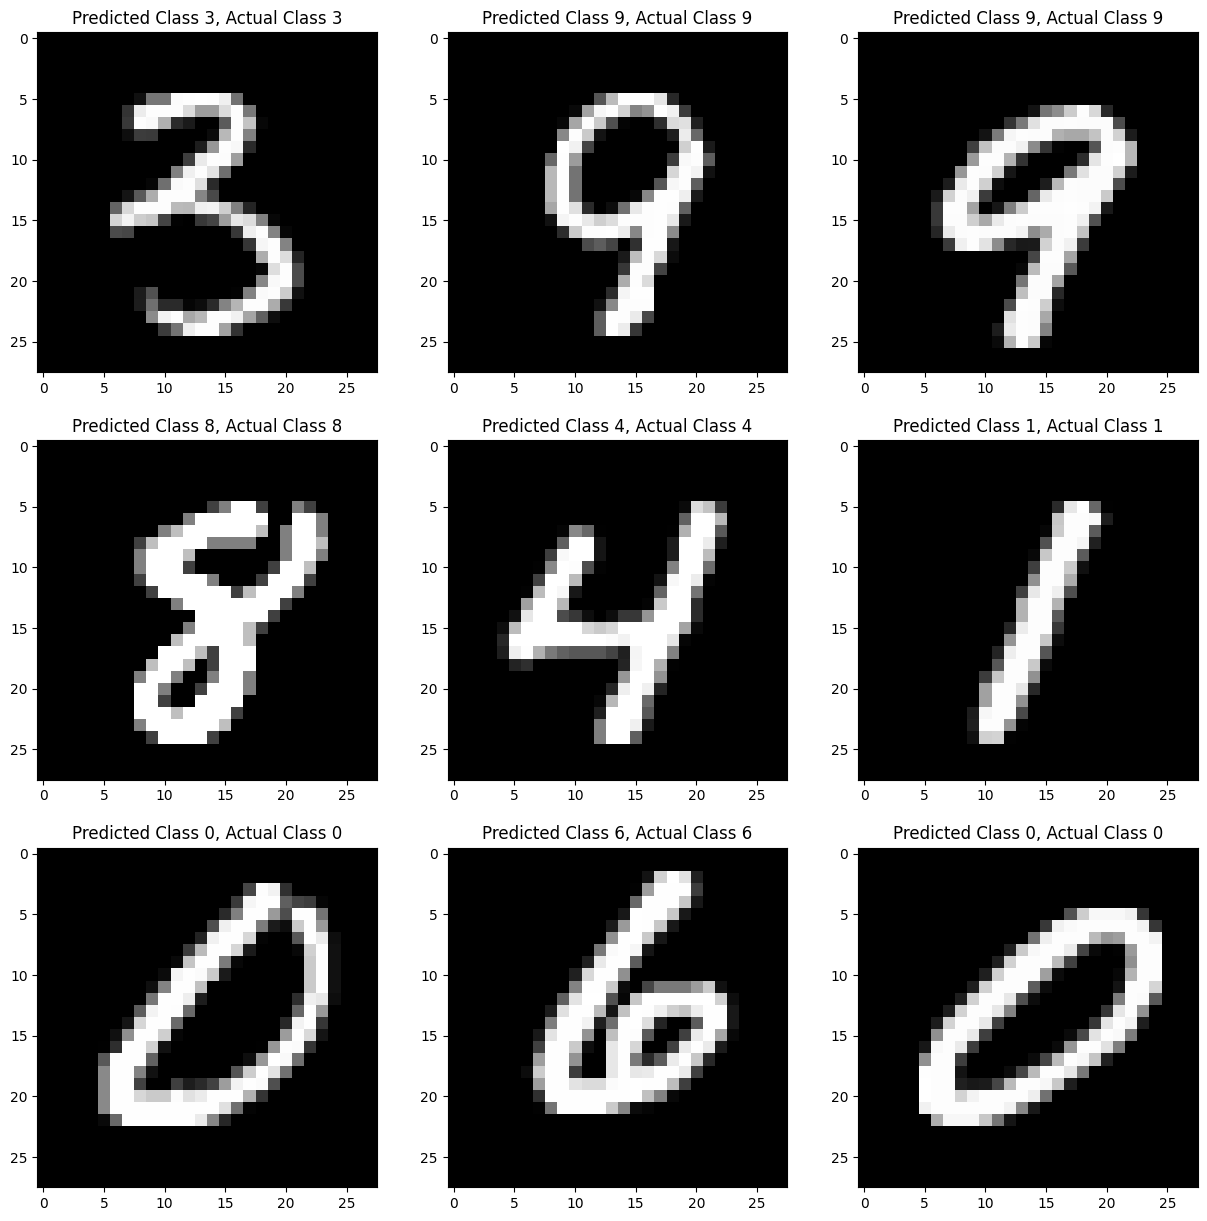

In [44]:
# Predict some images on test
fig, ax = plt.subplots(3,3, figsize = (15,15))
predictions = model.predict(x_test)
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray', interpolation='none')
    plt.title("Predicted Class {}, Actual Class {}".format(np.argmax(predictions[i]), y_test[i]))
plt.show()


In [45]:
# Export the model
model.save('model.h5')
print('Model saved as model.h5')

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved as model.h5
